# Identifying Handwritten Digits with Convolutional Nerual Networks using the MNIST Dataset

## Import Libraries and Load/Preprocess Data

In [1]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# LOAD THE DATA
train = pd.read_csv(r"C:\Users\broga\OneDrive\Desktop\MSBA\Adv_ML\PA\CNN\train.csv")
test = pd.read_csv(r"C:\Users\broga\OneDrive\Desktop\MSBA\Adv_ML\PA\CNN\test.csv")

# PREPARE DATA FOR NEURAL NETWORK
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)
X_train = X_train / 255.0
X_test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

# GLOBAL VARIABLES
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

## 1. How many convolution sub-sampling pairs?

Below we experiment with varying numbers of convolution-pooling pairs (3 variations). Model 1 has one (24 feature maps, size 5x5) Model 2 adds another (48 feature maps, kernel size 5x5). Model 3 adds a third (64 feature maps, pooling layer maintaining dimensions due to 'same' padding)

In [2]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 3
model = [0] *nets

for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [4]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["(C-P)x1","(C-P)x2","(C-P)x3"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2, Y_train2, batch_size=80, epochs=epochs, 
                              validation_data=(X_val2, Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j], epochs, max(history[j].history['accuracy']), max(history[j].history['val_accuracy']) ))


CNN (C-P)x1: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99328
CNN (C-P)x2: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99149
CNN (C-P)x3: Epochs=20, Train accuracy=0.99993, Validation accuracy=0.99271


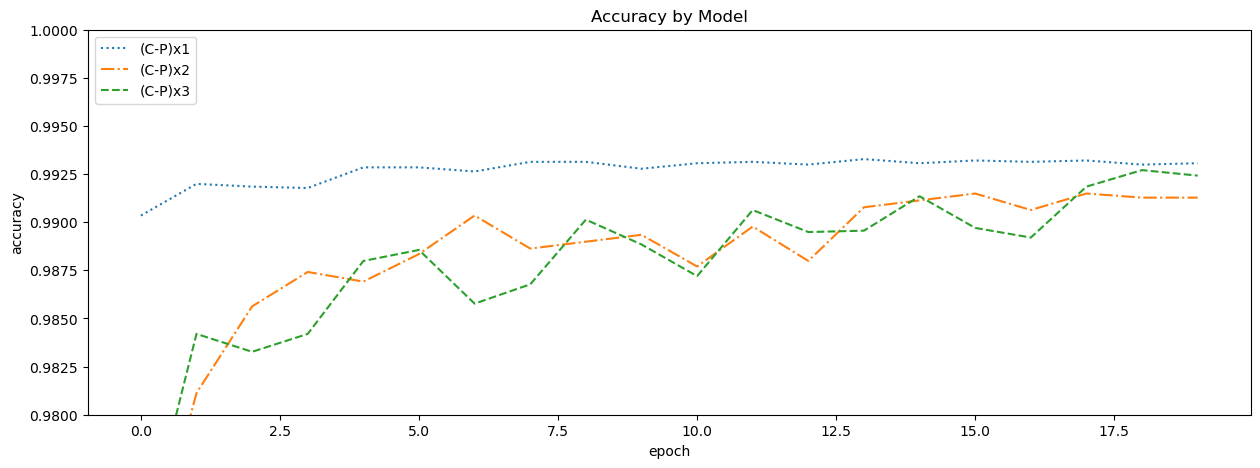

In [7]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('Accuracy by Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

The results show that the simplest model (one convolution-pooling pair) not only performs comparably to its more complex counterparts but does so with less risk of overfitting and lower computational cost. This suggests that for tasks like digit recognition on the MNIST dataset, simpler CNN architectures can be effective.

## 2. How many feature maps?

Now we can explore how the varying number of feature maps can affect a CNN's performance. We will consider several configurations (2-layer architecture) where the number of feature maps doubles from one convolutional layer to the next.

In [8]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 8 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.98827
CNN 16 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.98978
CNN 24 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99006
CNN 32 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99006
CNN 48 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99121
CNN 64 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99121


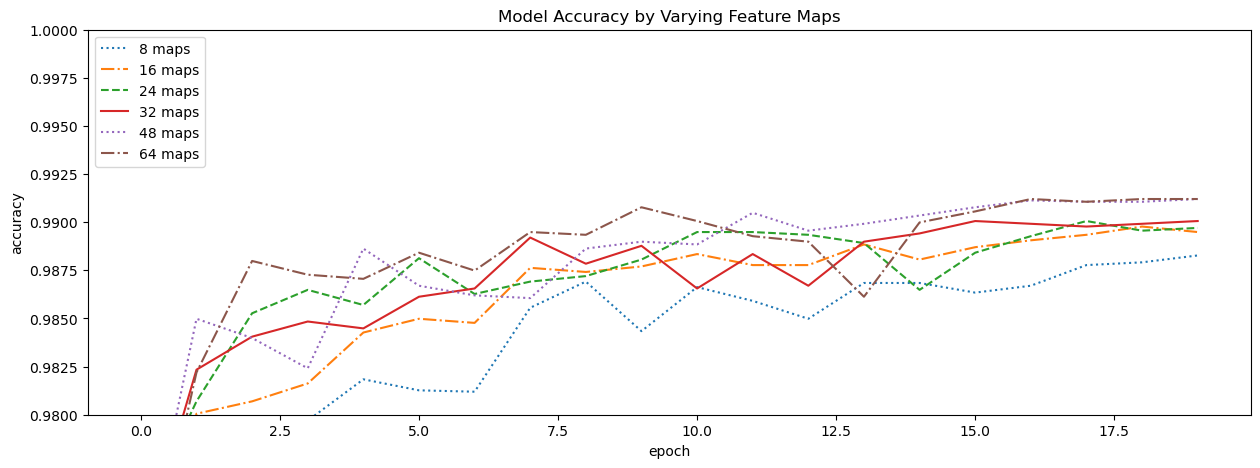

In [12]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('Model Accuracy by Varying Feature Maps')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

## 3. How large a dense layer?

We will now explore how the number of nuerons in a dense layer can impact the performance of a CNN.

In [14]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 0N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.98992
CNN 32N: Epochs=20, Train accuracy=0.99993, Validation accuracy=0.98992
CNN 64N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99221
CNN 128N: Epochs=20, Train accuracy=0.99989, Validation accuracy=0.99035
CNN 256N: Epochs=20, Train accuracy=0.99989, Validation accuracy=0.99264
CNN 512N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99213
CNN 1024N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99271
CNN 2048N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99271


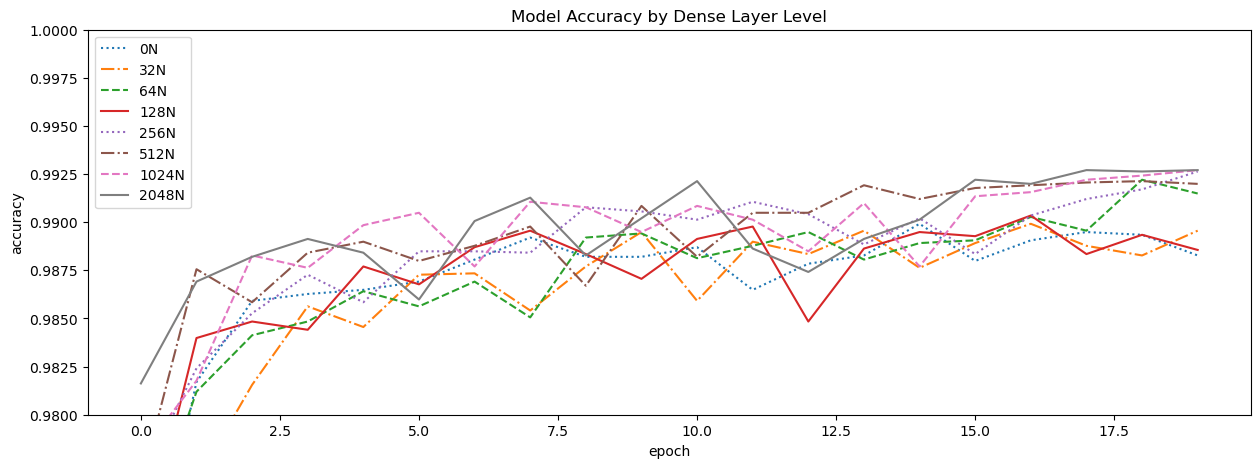

In [18]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('Model Accuracy by Dense Layer Level')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

The 2048 and 1024 provide slightly better results. These results provide a clear picture that while increasing the number of neurons in the dense layer of a CNN can improve model accuracy, there is a point beyond which further increases do not yield significant benefits.

## 4. How much dropout?

We can explore what level of dropout is optimal after each layer to prevent overfitting. I decided to simplify the model below slightly to improve computational performance for the sake of time.

In [21]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 30
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN D=0: Epochs=30, Train accuracy=0.99961, Validation accuracy=0.98570
CNN D=0.1: Epochs=30, Train accuracy=0.99586, Validation accuracy=0.98613
CNN D=0.2: Epochs=30, Train accuracy=0.99233, Validation accuracy=0.98656
CNN D=0.3: Epochs=30, Train accuracy=0.98965, Validation accuracy=0.98756
CNN D=0.4: Epochs=30, Train accuracy=0.98601, Validation accuracy=0.98763
CNN D=0.5: Epochs=30, Train accuracy=0.98008, Validation accuracy=0.98663
CNN D=0.6: Epochs=30, Train accuracy=0.97130, Validation accuracy=0.98556
CNN D=0.7: Epochs=30, Train accuracy=0.95584, Validation accuracy=0.98184


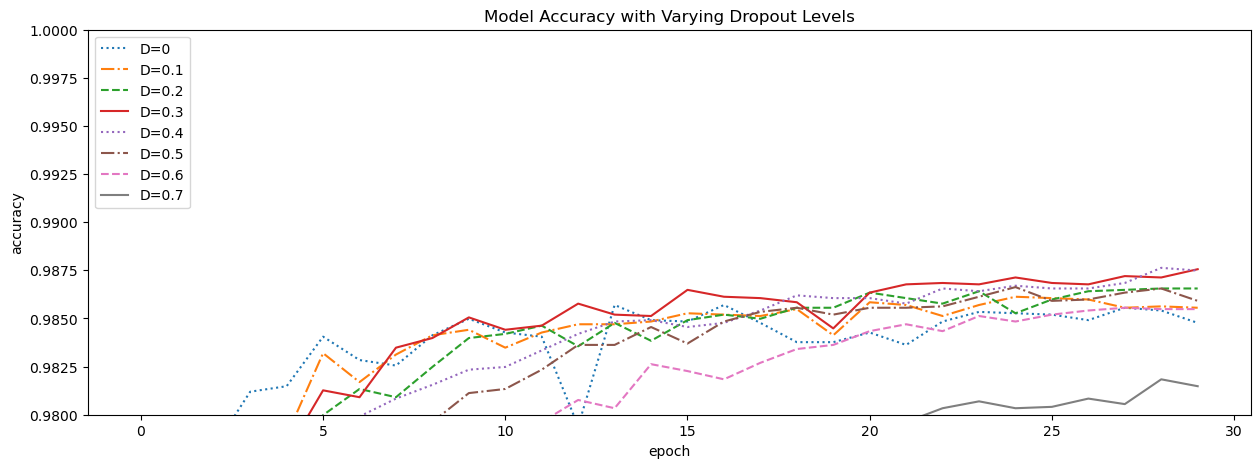

In [23]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('Model Accuracy with Varying Dropout Levels')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

From the results above, a dropout range between 30% and 40% appears to be optimal.
- CNN D=0: No dropout, highest training accuracy but lower validation accuracy.
- CNN D=0.1 to D=0.4: Increasing dropout rates, with a slight trend towards improved validation accuracy despite lower training accuracy.
- CNN D=0.5 to D=0.7: Higher dropout rates continue to decrease training accuracy, and validation accuracy starts to decline.

## 5. Advanced Features

Instead of using one convolution layer of size 5x5, you can mimic 5x5 by using two consecutive 3x3 layers and it will be more nonlinear. Instead of using a max pooling layer, you can subsample by using a convolution layer with strides=2 and it will be learnable. Lastly, does batch normalization help? And does data augmentation help? 

Let's test all four of these:
- replace '32C5' with '32C3-32C3'
- replace 'P2' with '32C5S2'
- add batch normalization
- add data augmentation

I reduced the size and simplified the setup of the models below due to computation/time resources but still maintained the integrity of the experiement.

In [33]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Constants
nets = 5  # Ensure this matches the number of models you're intending to train
names = ["basic", "32C3-32C3", "32C5S2", "both+BN", "both+BN+DA"]
styles = ['-', '--', '-.', ':', '-']

# Prepare Data
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size=0.2)

# Initialize History Array
history = [None] * nets

# Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Train Networks
for j in range(nets):
    if j == 4:  # Assuming the last model uses data augmentation
        history[j] = model[j].fit(
            datagen.flow(X_train2, Y_train2, batch_size=64),
            epochs=epochs,
            steps_per_epoch=X_train2.shape[0] // 64,
            validation_data=(X_val2, Y_val2),
            callbacks=[annealer],
            verbose=0
        )
    else:
        history[j] = model[j].fit(
            X_train2, Y_train2, 
            batch_size=64, 
            epochs=epochs,
            validation_data=(X_val2, Y_val2),
            callbacks=[annealer],
            verbose=0
        )
    print(f"CNN {names[j]}: Epochs={epochs}, Train accuracy={max(history[j].history['accuracy']):.5f}, Validation accuracy={max(history[j].history['val_accuracy']):.5f}")



CNN basic: Epochs=35, Train accuracy=0.99940, Validation accuracy=0.99679
CNN 32C3-32C3: Epochs=35, Train accuracy=0.99923, Validation accuracy=0.99524
CNN 32C5S2: Epochs=35, Train accuracy=0.99985, Validation accuracy=0.99643
CNN both+BN: Epochs=35, Train accuracy=0.99982, Validation accuracy=0.99607
CNN both+BN+DA: Epochs=35, Train accuracy=0.99015, Validation accuracy=0.99429


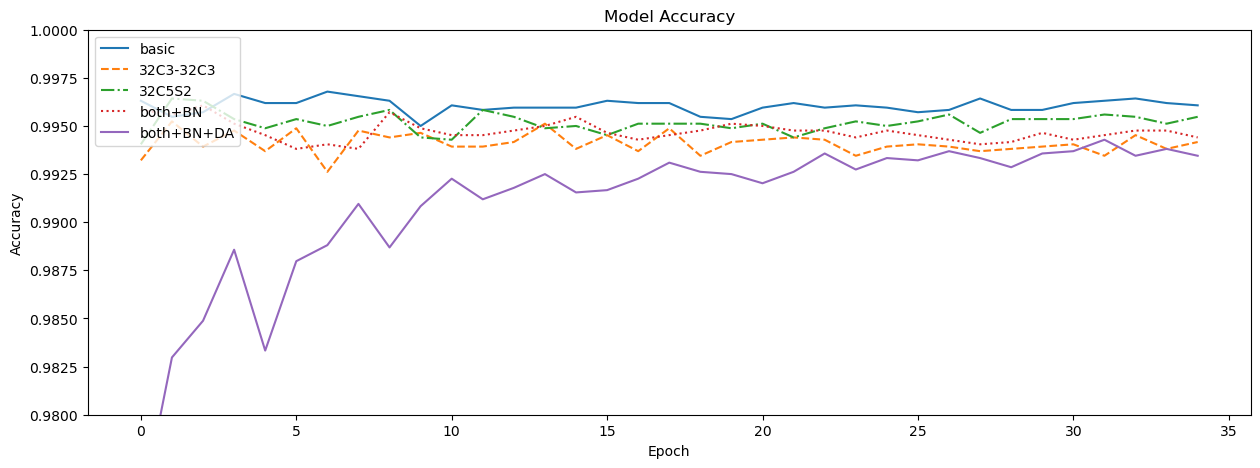

In [34]:

# Plot Accuracies
plt.figure(figsize=(15,5))
for i in range(nets):
    if history[i] is not None:
        plt.plot(history[i].history['val_accuracy'], linestyle=styles[i])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98, 1])
plt.show()

Contrary to the results from the article, the simplest model has the best performance. The best model's accuracy numbers and online are similar though. The nature of the MNIST dataset must be able to be captured with a less complex model, where more features does not necessarily add more value.